# 1. Load Training and Test Data from kaggel site

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

# 2. Not all the Training images have the facial keypoint features
### 2.1 Only 2,140 images have all features (facial keypoint coordinates available)

Training Data Variables and count


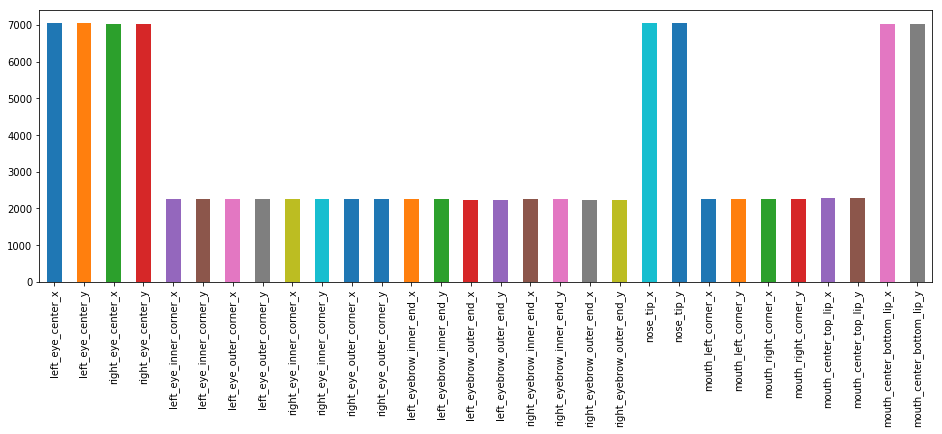

In [530]:
print('Training Data Variables and count')
plt.figure(figsize=(16,5))
train_data.describe().loc['count'].plot.bar()
plt.show()

## 2.2 For baseline analysis, retain only those images that have all keypoint coordinates available in the training data
#### 2.2.1 Also, seperate out the image pixle values from space seperated value to coma seperated array/ list

In [531]:
#Seperate out the image pixle values into a comma seperated array 
train_data['Image'] = test_df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)

#### 2.2.2 Create a list of all features, one for x and another for y coordinates

In [532]:
#Train data output field
output_field_x = ['left_eye_center_x','right_eye_center_x',
'left_eye_inner_corner_x','left_eye_outer_corner_x','right_eye_inner_corner_x','right_eye_outer_corner_x',
'left_eyebrow_inner_end_x','left_eyebrow_outer_end_x','right_eyebrow_inner_end_x','right_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_left_corner_x','mouth_right_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
output_field_y = ['left_eye_center_y','right_eye_center_y',
'left_eye_inner_corner_y','left_eye_outer_corner_y','right_eye_inner_corner_y','right_eye_outer_corner_y',
'left_eyebrow_inner_end_y','left_eyebrow_outer_end_y','right_eyebrow_inner_end_y','right_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_left_corner_y','mouth_right_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']
# Flip data output field
flip_output_field_x = ['right_eye_center_x','left_eye_center_x',
'right_eye_inner_corner_x','right_eye_outer_corner_x','left_eye_inner_corner_x','left_eye_outer_corner_x',
'right_eyebrow_inner_end_x','right_eyebrow_outer_end_x','left_eyebrow_inner_end_x','left_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_right_corner_x','mouth_left_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
flip_output_field_y = ['right_eye_center_y','left_eye_center_y',
'right_eye_inner_corner_y','right_eye_outer_corner_y','left_eye_inner_corner_y','left_eye_outer_corner_y',
'right_eyebrow_inner_end_y','right_eyebrow_outer_end_y','left_eyebrow_inner_end_y','left_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_right_corner_y','mouth_left_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']

## 2.3 Since we only 2,140 images for training and testing baseline assumptions, we have created 2,140 more images by simply flipping the image on y-axis

In [533]:
# FLIP TRAINING IMAGES
flip_train_data = train_data.copy()
print(len(flip_train_data))
for x1,x2 in zip(output_field_x,flip_output_field_x):
    flip_train_data[x2] = 95-train_data[x1]
for y1,y2 in zip(output_field_y,flip_output_field_y):
    flip_train_data[y2] = train_data[y1]

flipped_image_list = []
for i in range(len(flip_train_data)):
    flipped_image_list.append(np.flip(flip_train_data['Image'][i].reshape(96,96),1).reshape(96*96))
new_df = pd.DataFrame({'Image': flipped_image_list})
flip_train_data.update(new_df)
flip_train_data.describe().loc[['mean']]

2140


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
mean,65.359731,37.063815,28.778451,36.842274,58.396893,37.920852,72.638383,38.034571,35.727872,37.856014,...,47.047859,57.253926,62.032635,76.134065,31.580924,75.88766,46.918675,72.681125,46.850346,82.630412


Print a sample image from training data


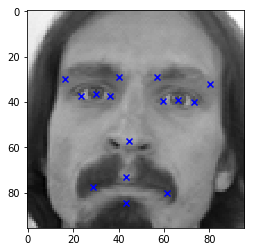

In [534]:
print('Print a sample image from training data')
plt.imshow((train_data['Image'][0]).reshape(96,96),cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

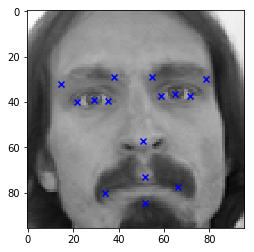

In [535]:
flip_im = flip_train_data['Image'][0].reshape(96,96)
plt.imshow(flip_im,cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = 95-train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

# 3. Split 4,280 training images into 80% Training and 20% Test data

In [536]:
#APPEND AND SHUFFLE TRAINING DATA AND FLIPPED TRAINING DATA
train_data_extended = train_data.append(flip_train_data).sample(frac=1).reset_index(drop=True)
baseline_train = train_data_extended.loc[np.arange(0,int(0.8*len(train_data_extended)))].reset_index(drop=True)
avg_train_x_y = baseline_train.describe().loc[['mean']]
baseline_test = train_data_extended.loc[np.arange(int(0.8*len(train_data_extended)),len(train_data_extended))].reset_index(drop=True)

# 4. We are simply going to take an average of all keypoint cordinates from training data set to be the predicted keypoint cordinates

In [537]:
print('Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint')
avg_train_x_y.transpose()

Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint


,mean
left_eye_center_x,65.787117
left_eye_center_y,36.924805
right_eye_center_x,29.196876
right_eye_center_y,36.937899
left_eye_inner_corner_x,58.818710
left_eye_inner_corner_y,37.867928
left_eye_outer_corner_x,73.023513
left_eye_outer_corner_y,37.798031
right_eye_inner_corner_x,36.153555
right_eye_inner_corner_y,37.876290


# 5. Use the predicted keypoint cordinates to find RMSE through comparison with the actual keypoints from the dev data

In [547]:
import math
SS_dist = []
RMSE_LIST = []
for i in range(len(baseline_test)):
    L2_dist = []
    RMSE = 0
    for x,y in zip(output_field_x,output_field_y):
        x_dist = (baseline_test[x][i]-avg_train_x_y[x][0])**2
        y_dist = (baseline_test[y][i]-avg_train_x_y[y][0])**2
        L2_dist.append(math.sqrt(x_dist+y_dist))
        RMSE = RMSE+x_dist+y_dist
    RMSE_LIST.append(RMSE)
    SS_dist.append(L2_dist)

SS_DF = pd.DataFrame(data=SS_dist,columns=output_field_x)
SS_DF_mean = pd.DataFrame(data=SS_dist,columns=output_field_x).describe().loc[['mean']]
print('Mean pixle distance between the actual and predicted facial keypoints:')
SS_DF_mean.loc['mean']

Mean pixle distance between the actual and predicted facial keypoints:


left_eye_center_x            2.520153
right_eye_center_x           2.587645
left_eye_inner_corner_x      2.303727
left_eye_outer_corner_x      3.192388
right_eye_inner_corner_x     2.394628
right_eye_outer_corner_x     3.199437
left_eyebrow_inner_end_x     3.287564
left_eyebrow_outer_end_x     4.068400
right_eyebrow_inner_end_x    3.391623
right_eyebrow_outer_end_x    4.201634
nose_tip_x                   4.503437
mouth_left_corner_x          4.731858
mouth_right_corner_x         4.780987
mouth_center_top_lip_x       4.703556
mouth_center_bottom_lip_x    4.747167
Name: mean, dtype: float64

In [539]:
SS_DF['Avg Distances'] = SS_DF.sum(axis = 1, skipna = True)

# 5.1 Images with highest RMSE

In [540]:
print('Top 5 images with highest RMSE')
SS_DF.sort_values(by = ['Avg Distances'], ascending=False)[0:5]

Top 5 images with highest RMSE


,left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,left_eye_outer_corner_x,right_eye_inner_corner_x,right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x,Avg Distances
784,10.771797,18.021719,13.328659,7.651265,17.237224,20.109060,15.190067,6.616835,20.687224,23.934420,23.114705,8.768752,17.075424,15.595667,17.658622,235.761439
497,9.217062,9.283117,4.569418,12.518614,7.245254,12.509512,7.475150,15.546825,11.067152,16.936073,4.334094,15.544725,13.621476,12.135539,14.971692,166.975703
345,8.431765,8.606310,3.751645,11.149620,6.420347,11.642618,4.500578,14.676928,9.875631,15.316620,5.595601,16.821769,15.046073,13.087246,17.792207,162.714958
433,13.144453,12.611068,10.850370,13.770666,11.630850,13.431316,11.103544,19.578410,11.259088,17.539632,3.872212,4.976779,4.792797,6.127151,4.213036,158.901369
592,13.034843,5.341219,5.073899,14.617837,6.534177,3.071294,3.115152,12.691253,1.044542,10.100856,6.808271,22.675342,17.715385,21.386251,13.177741,156.388062


Print a sample image with highest RMSE
Blue: Actual
Red: Predicted


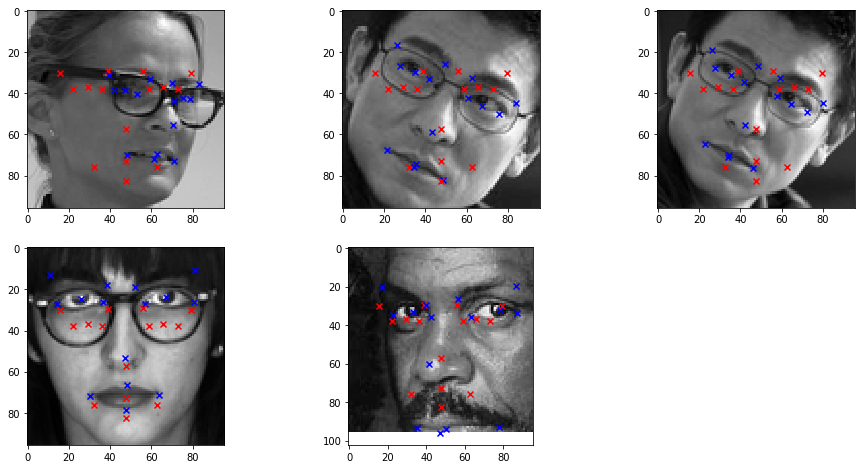

In [541]:
print('Print a sample image with highest RMSE\nBlue: Actual\nRed: Predicted')
plt.figure(figsize=(16,8))
count=0
for i in SS_DF.sort_values(by = ['Avg Distances'], ascending=False)[0:5].index:
    count=count+1
    plt.subplot(2,3,count)
    plt.imshow((baseline_test['Image'][i]).reshape(96,96),cmap='gray')
    for x,y in zip(output_field_x,output_field_y):
        X1 = avg_train_x_y[x][0]
        Y1 = avg_train_x_y[y][0]
        X2 = baseline_test[x][i]
        Y2 = baseline_test[y][i]
        plt.scatter(X1,Y1,marker='x',color='red')
        plt.scatter(X2,Y2,marker='x',color='blue')
plt.show()

In [551]:
print('Overall RMSE for the Facial keypoint analysis baseline is: '
      +str(round(math.sqrt(sum(RMSE_LIST)/(len(baseline_test)*30)),2)))

Overall RMSE for the Facial keypoint analysis baseline is: 3.16
